<a href="https://colab.research.google.com/github/EdvardRonglan/PS4HouseDataExercise/blob/master/Predict_House_Prices_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv' and "data_description.txt"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X_{1}\beta_{1} + X_{2}\beta_{2} + X_{3}\beta_{3}...$$

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/johntango/PS4HouseDataExercise/master/train.csv')
data.shape
train = data.iloc[:,:]

train.to_json('housedata.json')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# New Section

In [ ]:
# investigate Sale Price
train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

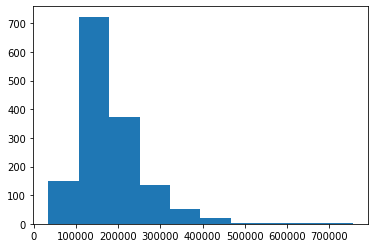

In [ ]:
# plot hist
plt.hist(train['SalePrice'])

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from statsmodels.regression.linear_model import OLS

# Make non-numeric colums numeric
numeric = train.select_dtypes(include=[np.number])
numeric.shape
non_numeric = train.loc[:, ~train.columns.isin(numeric.columns.to_list())]
for col in non_numeric.columns:
  train[col] = train[col].astype('category')
  train[col] = train[col].cat.codes


# Removes NaN values
imp = IterativeImputer()
df_imp = imp.fit_transform(train)
df_imp = pd.DataFrame(df_imp)
df_imp.columns = train.columns
train = df_imp

X = train.loc[:,train.columns !='SalePrice']
Y = train['SalePrice']

In [ ]:
# buld Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)

In [ ]:
# How good is the model
model.score(X,Y)


0.8688711791894518

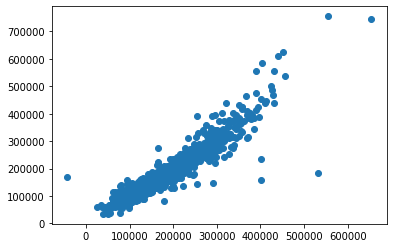

In [ ]:
# Scatter plot of predictions
plt.scatter(predictions, Y)

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/johntango/PS4HouseDataExercise/master/test.csv')

In [ ]:
# Make non-numeric colums numeric
numeric = test_data.select_dtypes(include=[np.number])
numeric.shape
non_numeric = test_data.loc[:, ~test_data.columns.isin(numeric.columns.to_list())]
for col in non_numeric.columns:
  test_data[col] = test_data[col].astype('category')
  test_data[col] = test_data[col].cat.codes


# Removes/predicts NaN values
imp = IterativeImputer()
df_imp = imp.fit_transform(test_data)
df_imp = pd.DataFrame(df_imp)
df_imp.columns = test_data.columns
test_data = df_imp

In [60]:
test_predictions = model.predict(test_data)

In [61]:
result = pd.DataFrame()
result["Id"] = test_data["Id"]
result["SalePrice"] = test_predictions

#from google.colab import  drive
#drive.mount('/drive')
#result.to_csv('/drive/My Drive/1125_Pset4/predictions.csv', index=False)